<a href="https://colab.research.google.com/github/cristiandarioortegayubro/dataidea/blob/main/meeting_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

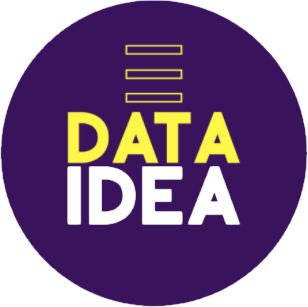

#**Visualizaciones con MatPlotLib y Altair**

## Habilitando los módulos

Habitualmente se habilitan los módulos de la siguiente forma:

In [1]:
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
import altair as alt

## Obteniendo los datos

In [2]:
def criptomonedas(simbolo):
  a=data.DataReader(simbolo, start="2021-05-05", end="2021-05-25", data_source="yahoo")
  simbolo=pd.DataFrame(a)
  simbolo.insert(0,column="Date",value=simbolo.index.values)
  simbolo.insert(1,column="Day",value=pd.DatetimeIndex(simbolo["Date"]).day_name())
  simbolo["Pct_Change"] = simbolo.Close.pct_change()*100
  simbolo["Diff"] = simbolo.Close.diff()
  simbolo["Eval"] = simbolo.eval("Close >= Open")
  simbolo.drop(["Volume", "Adj Close"], axis=1, inplace=True)
  simbolo.dropna(how="any", inplace=True)
  simbolo.reset_index(drop=True, inplace=True)
  return simbolo

LITECOIN = criptomonedas("LTC-USD")
LITECOIN["Name"] = "Litecoin"
MONERO = criptomonedas("XMR-USD")
MONERO["Name"] = "Monero"
BINANCE = criptomonedas("BNB-USD")
BINANCE["Name"] = "Binance"
AAVE = criptomonedas("AAVE-USD")
AAVE["Name"] = "Aave"

union = [LITECOIN,MONERO,BINANCE,AAVE] # lista con objetos
portafolio = pd.concat(union)

# MatPlotLib

## Formatos disponibles 
Podemos visualizar cuales son los formatos disponibles y de esa forma elegir uno, para establecer el aspecto de nuestro gráfico

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Gráficos basicos

### Gráfico lineal simple

In [4]:
LITECOIN.head(3)

,Date,Day,High,Low,Open,Close,Pct_Change,Diff,Eval,Name
0,2021-05-05,Wednesday,364.517609,323.705444,356.022125,353.510345,-0.709683,-2.526733,False,Litecoin
1,2021-05-06,Thursday,372.265411,333.995178,354.506836,346.253571,-2.052776,-7.256775,False,Litecoin
2,2021-05-07,Friday,356.032867,334.975769,345.296875,346.368744,0.033263,0.115173,True,Litecoin


In [5]:
plt.style.use("ggplot")

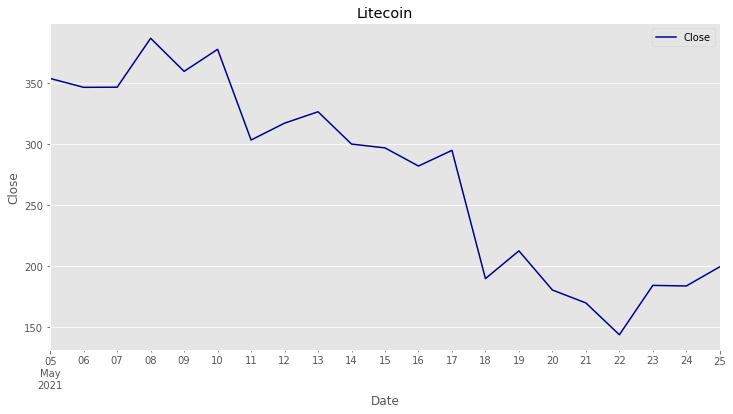

In [6]:
LITECOIN.plot("Date","Close", 
          kind="line", 
          figsize=(12,6), 
          color="darkblue", 
          title="Litecoin", 
          ylabel = "Close",
          xlabel = "Date")

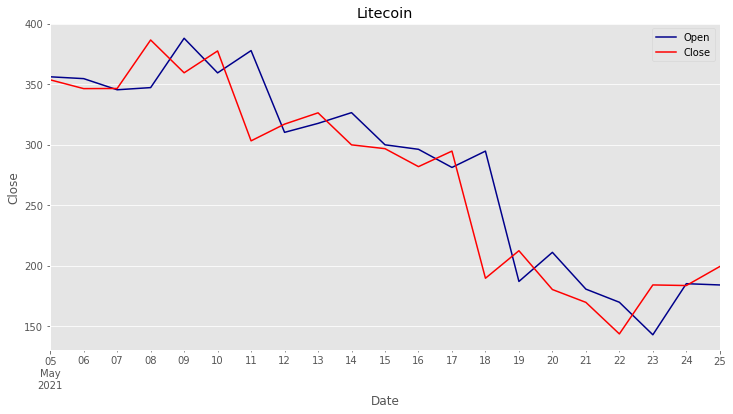

In [7]:
LITECOIN.plot("Date",["Open","Close"], 
          kind="line", 
          figsize=(12,6), 
          color=["darkblue","red"], 
          title="Litecoin", 
          ylabel = "Close",
          xlabel = "Date")

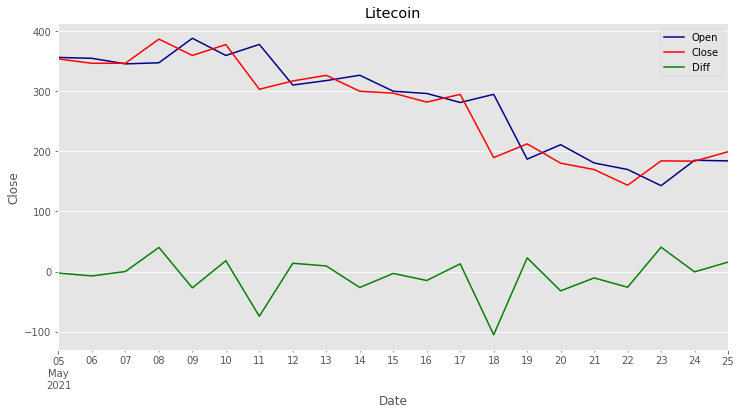

In [8]:
LITECOIN.plot("Date",["Open","Close","Diff"], 
          kind="line", 
          figsize=(12,6), 
          color=["darkblue","red","green"], 
          title="Litecoin", 
          ylabel = "Close",
          xlabel = "Date")

Text(0.5, 1.0, 'Criptomonedas')

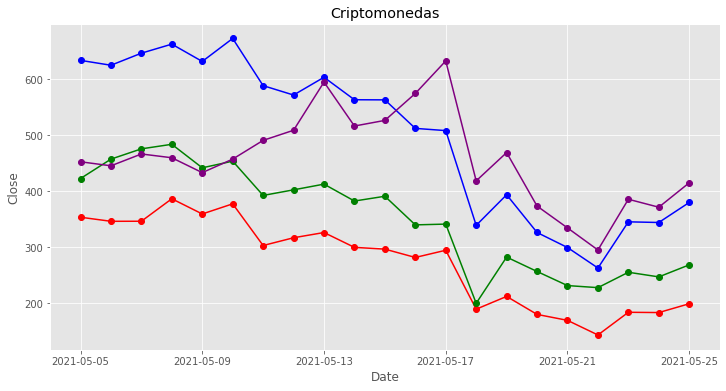

In [51]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(LITECOIN.Date, LITECOIN.Close, marker="o", label="LITECOIN", color="red")
ax.plot(BINANCE.Date, BINANCE.Close, marker="o", label="BINANCE", color="blue")
ax.plot(MONERO.Date, MONERO.Close, marker="o", label="MONERO", color="green")
ax.plot(AAVE.Date, AAVE.Close, marker="o", label="AAVE", color="purple")

ax.set_xlabel("Date")  
ax.set_ylabel("Close")  

ax.set_title("Criptomonedas")

Text(0.5, 1.0, 'Aave')

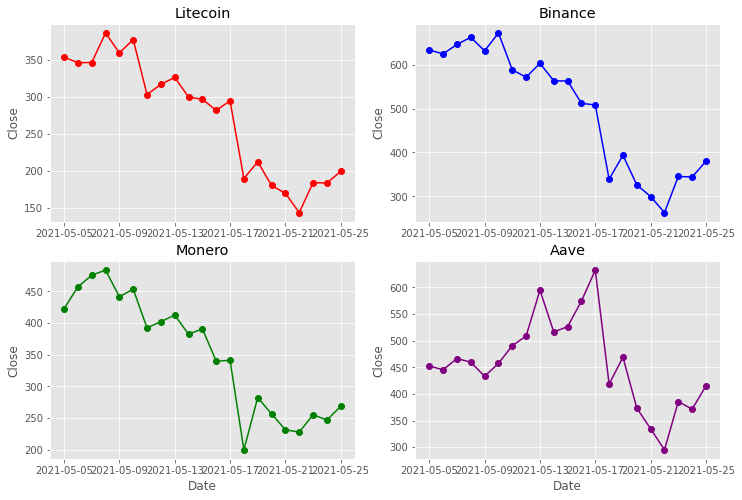

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))

axs[0,0].plot(LITECOIN.Date, LITECOIN.Close, marker="o", color="red")
axs[0,0].set_ylabel("Close")
axs[0,0].set_title("Litecoin")

axs[0,1].plot(BINANCE.Date, BINANCE.Close, marker="o", color="blue")
axs[0,1].set_ylabel("Close")
axs[0,1].set_title("Binance")

axs[1,0].plot(MONERO.Date, MONERO.Close, marker="o", color="green")
axs[1,0].set_xlabel("Date")
axs[1,0].set_ylabel("Close")
axs[1,0].set_title("Monero")

axs[1,1].plot(AAVE.Date, AAVE.Close, marker="o", color="purple")
axs[1,1].set_xlabel("Date")
axs[1,1].set_ylabel("Close")
axs[1,1].set_title("Aave")


### Gráfico de area

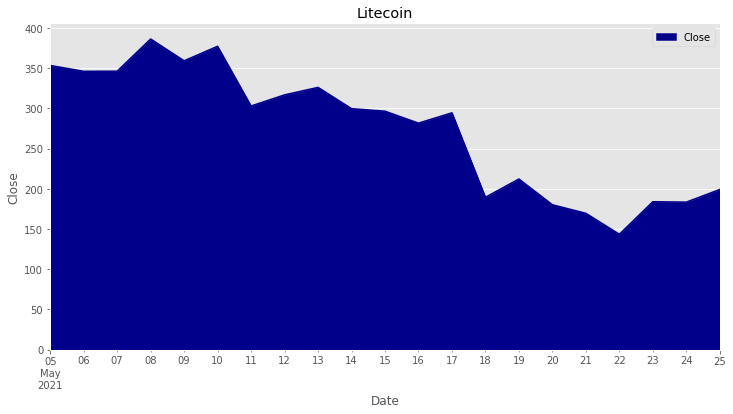

In [17]:
LITECOIN.plot("Date","Close", 
          kind="area", 
          figsize=(12,6), 
          color="darkblue", 
          title="Litecoin", 
          ylabel = "Close",
          xlabel = "Date")

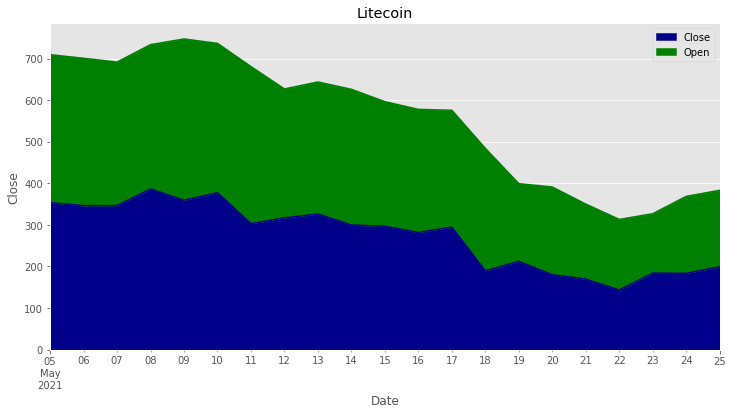

In [20]:
LITECOIN.plot("Date",["Close","Open"], 
          kind="area", 
          figsize=(12,6), 
          color=["darkblue","Green"], 
          title="Litecoin", 
          ylabel = "Close",
          xlabel = "Date")

### Gráfico de barras

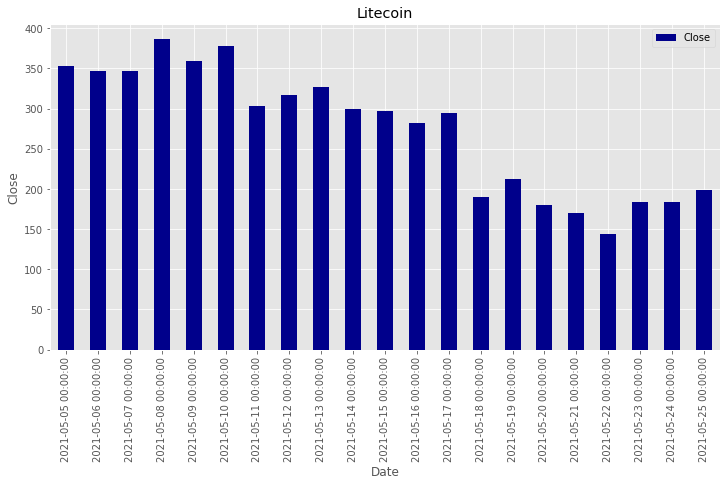

In [59]:
LITECOIN.plot("Date","Close", 
          kind="bar", 
          figsize=(12,6), 
          color="darkblue", 
          title="Litecoin", 
          ylabel = "Close",
          xlabel = "Date")

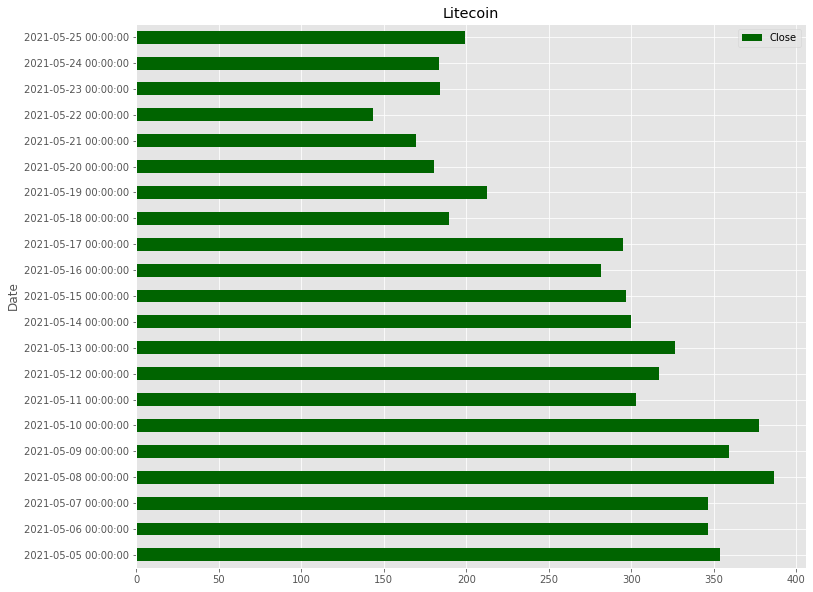

In [63]:
LITECOIN.plot("Date","Close", 
          kind="barh", 
          figsize=(12,10), 
          color="darkgreen", 
          title="Litecoin", 
          ylabel = "Close",
          xlabel = "Date")

## Ajuste al DataFrame

In [65]:
Portafolio = pd.DataFrame()
Portafolio["Date"] = LITECOIN.Date

In [66]:
Portafolio["Litecoin"] = LITECOIN.Close
Portafolio["Binance"] = BINANCE.Close
Portafolio["Monero"] = MONERO.Close
Portafolio["Aave"] = AAVE.Close

In [67]:
Portafolio.head(3)

,Date,Litecoin,Binance,Monero,Aave
0,2021-05-05,353.510345,633.280396,422.517395,452.408752
1,2021-05-06,346.253571,624.563293,457.144989,445.222382
2,2021-05-07,346.368744,646.100830,475.472778,466.317566


Ahora si...

### Gráfico lineal múltiple

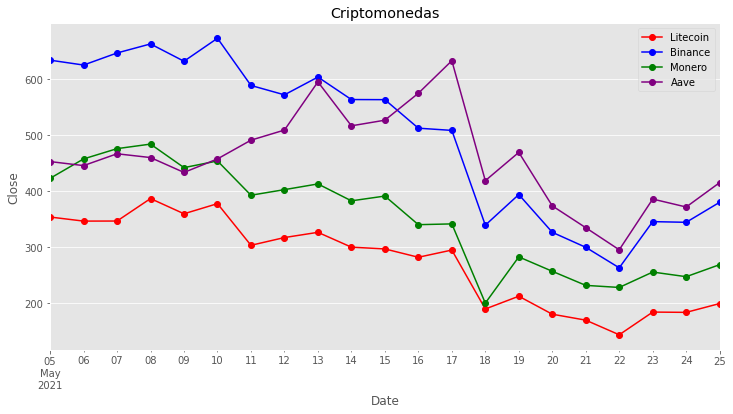

In [68]:
Portafolio.plot("Date",["Litecoin","Binance","Monero","Aave"], 
          kind="line", 
          figsize=(12,6), 
          color=["red","blue","green","purple"],
          marker="o", 
          title="Criptomonedas", 
          ylabel = "Close",
          xlabel = "Date")

### Gráfico de area múltiple

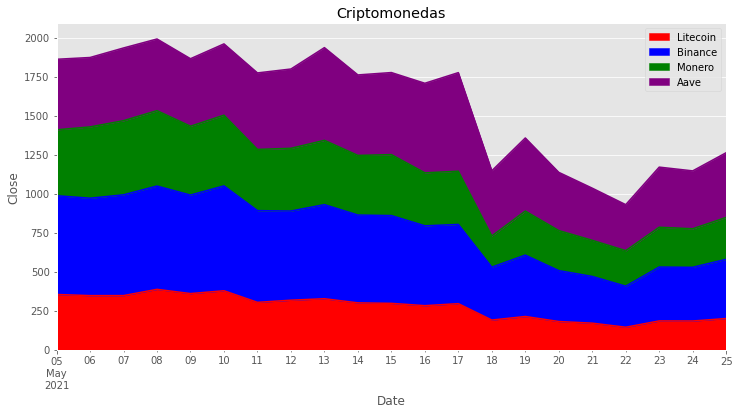

In [70]:
Portafolio.plot("Date",["Litecoin","Binance","Monero","Aave"], 
          kind="area", 
          figsize=(12,6), 
          color=["red","blue","green","purple"],
          title="Criptomonedas", 
          ylabel = "Close",
          xlabel = "Date")

### Gráfico de barras multiple

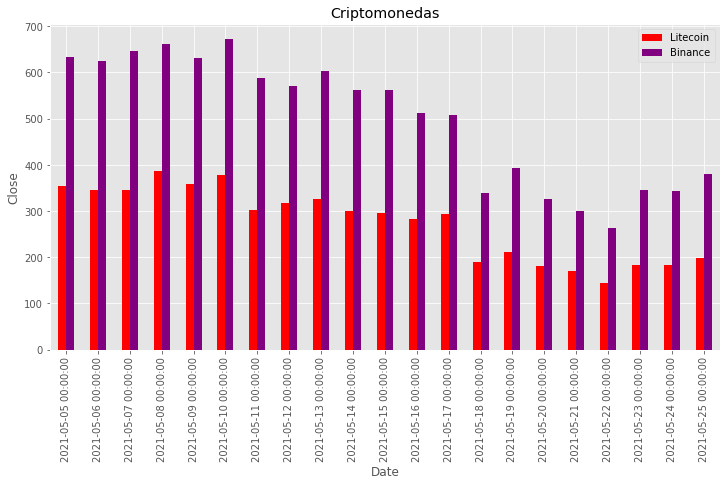

In [112]:
Portafolio.plot("Date",["Litecoin","Binance"], 
          kind="bar", 
          figsize=(12,6), 
          color=["red","purple"],
          title="Criptomonedas", 
          ylabel = "Close",
          xlabel = "Date")

### Gráfico de cajas - Box Plots

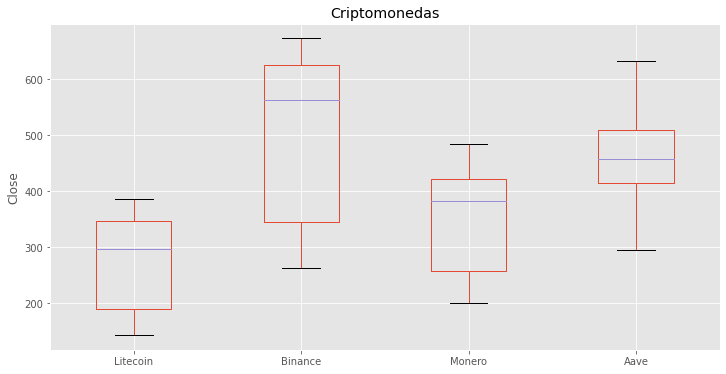

In [88]:
Portafolio.plot("Date",["Litecoin","Binance","Monero","Aave"], 
          kind="box", 
          figsize=(12,6), 
          title="Criptomonedas", 
          ylabel = "Close")

### Gráfico de densidad

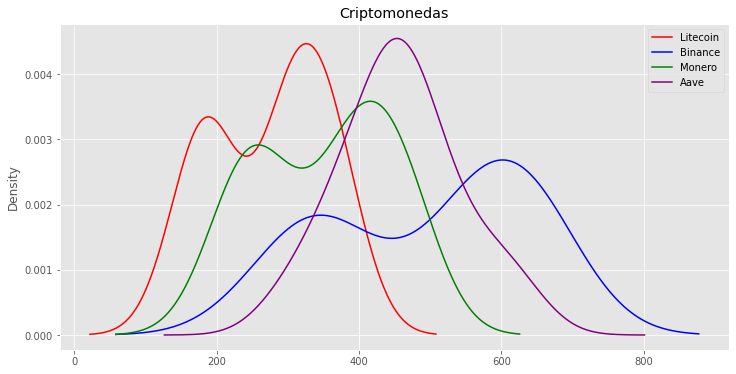

In [90]:
Portafolio.plot("Date",["Litecoin","Binance","Monero","Aave"], 
          kind="density", 
          figsize=(12,6), 
          color=["red","blue","green","purple"],
          title="Criptomonedas")

In [97]:
Portafolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      21 non-null     datetime64[ns]
 1   Litecoin  21 non-null     float64       
 2   Binance   21 non-null     float64       
 3   Monero    21 non-null     float64       
 4   Aave      21 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 968.0 bytes


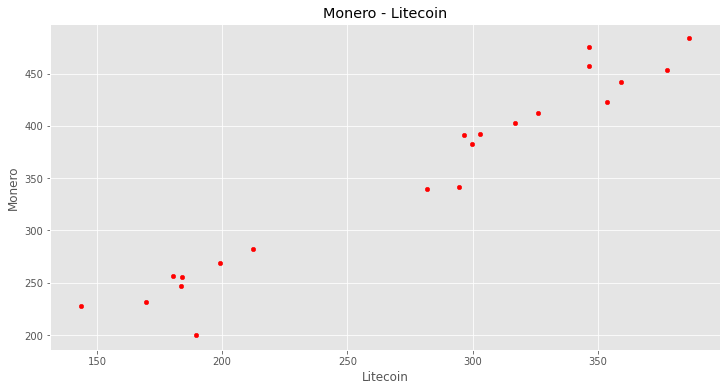

In [111]:
Portafolio.plot("Litecoin","Monero", 
          kind="scatter",
          figsize=(12,6),
          color="red",
          marker="o",
          title="Monero - Litecoin")

# Altair

In [113]:
portafolio.head(3)

,Date,Day,High,Low,Open,Close,Pct_Change,Diff,Eval,Name
0,2021-05-05,Wednesday,364.517609,323.705444,356.022125,353.510345,-0.709683,-2.526733,False,Litecoin
1,2021-05-06,Thursday,372.265411,333.995178,354.506836,346.253571,-2.052776,-7.256775,False,Litecoin
2,2021-05-07,Friday,356.032867,334.975769,345.296875,346.368744,0.033263,0.115173,True,Litecoin


## Gráficos basicos

### Gráfico lineal simple

In [116]:
alt.Chart(portafolio).mark_line().encode(
  x="Date",
  y="Close",
  color="Name").interactive()

alt.Chart(...)

In [134]:
alt.Chart(portafolio).mark_line(point=True).encode(
    x="Date",
    y="Close",
    color="Name").interactive()

alt.Chart(...)

In [145]:
alt.Chart(portafolio).mark_line(point=True).encode(
    x="Date",
    y="Close",
    color="Name",
    strokeDash='Name').interactive()

alt.Chart(...)

In [141]:
alt.Chart(portafolio).mark_line(point=True).encode(
  x="Date",
  y=alt.Y("Close"),
  color="Name",
  row="Name").properties(height=100).interactive()


alt.Chart(...)

### Graficos de Barras Verticales

In [142]:
alt.Chart(portafolio).mark_bar().encode(
  x="Date",
  y="Close",
  color="Name").interactive()

alt.Chart(...)

### Graficos de Barras Horizontales

In [144]:
alt.Chart(portafolio).mark_bar().encode(
  x="Close",
  y="Date",
  color="Name").interactive()

alt.Chart(...)

### Grafico de area

In [125]:
alt.Chart(portafolio).mark_area().encode(
  x="Date",
  y="Close",
  color="Name").interactive()

alt.Chart(...)

In [136]:
alt.Chart(portafolio).mark_area().encode(
    x="Date",
    y="Close",
    color="Name",
    row="Name").properties(height=100).interactive()


alt.Chart(...)

### Grafico de dispersión

In [129]:
alt.Chart(portafolio).mark_circle().encode(
    x="Date",
    y="Close",
    color="Name",
    size="Close").interactive()

alt.Chart(...)

In [130]:
alt.Chart(portafolio).mark_point().encode(
    x="Date",
    y="Close",
    color="Name",
    size="Close").interactive()

alt.Chart(...)

In [ ]:
.properties(
    width=200,
    height=200

In [150]:
alt.Chart(portafolio).mark_point().encode(
    x="Date",
    y="Close",
    color="Name",
    size="Close").properties(
    width=600,
    height=350).interactive()

alt.Chart(...)